<div style="background: linear-gradient(135deg, #1a1a2e 0%, #16213e 50%, #0f3460 100%); padding: 40px; border-radius: 20px; margin-bottom: 30px; box-shadow: 0 20px 60px rgba(0,0,0,0.3);">
    <div style="text-align: center;">
        <h1 style="color: #FFD700; font-size: 3em; margin-bottom: 10px; text-shadow: 2px 2px 4px rgba(0,0,0,0.5);">🌽 Global Corn Supply and Demand</h1>
        <h2 style="color: #E94560; font-size: 1.8em; margin-bottom: 20px;">Master Analysis (1975-2026)</h2>
        <p style="color: #00D9FF; font-size: 1.3em; font-style: italic;">50 Years of Agricultural Market Insights</p>
        <hr style="border: 1px solid #FFD700; width: 60%; margin: 25px auto;">
        <div style="display: flex; justify-content: center; gap: 20px; flex-wrap: wrap; margin-top: 20px;">
            <span style="background: #E94560; color: white; padding: 8px 20px; border-radius: 25px; font-weight: bold;">📊 EDA</span>
            <span style="background: #00D9FF; color: #1a1a2e; padding: 8px 20px; border-radius: 25px; font-weight: bold;">📈 Time Series</span>
            <span style="background: #FFD700; color: #1a1a2e; padding: 8px 20px; border-radius: 25px; font-weight: bold;">🌾 Agriculture</span>
        </div>
        <p style="color: #aaa; margin-top: 30px; font-size: 0.95em;">Author: <strong style="color: #FFD700;">Eng. Hassan Jameel</strong> | 📅 January 2026</p>
        <div style="display: flex; justify-content: center; gap: 25px; flex-wrap: wrap; margin-top: 20px;">
            <a href="https://www.linkedin.com/in/hassanjameel/" target="_blank" style="text-decoration: none; background: linear-gradient(135deg, #0077B5, #00A0DC); color: white; padding: 10px 25px; border-radius: 30px; font-weight: bold; box-shadow: 0 4px 15px rgba(0,119,181,0.4);">LinkedIn</a>
            <a href="https://github.com/HassanJamel/" target="_blank" style="text-decoration: none; background: linear-gradient(135deg, #333, #6e5494); color: white; padding: 10px 25px; border-radius: 30px; font-weight: bold; box-shadow: 0 4px 15px rgba(110,84,148,0.4);">GitHub</a>
            <a href="https://hassanjamel.github.io/my_profile/" target="_blank" style="text-decoration: none; background: linear-gradient(135deg, #E94560, #FF6B6B); color: white; padding: 10px 25px; border-radius: 30px; font-weight: bold; box-shadow: 0 4px 15px rgba(233,69,96,0.4);">Portfolio</a>
        </div>
    </div>
</div>

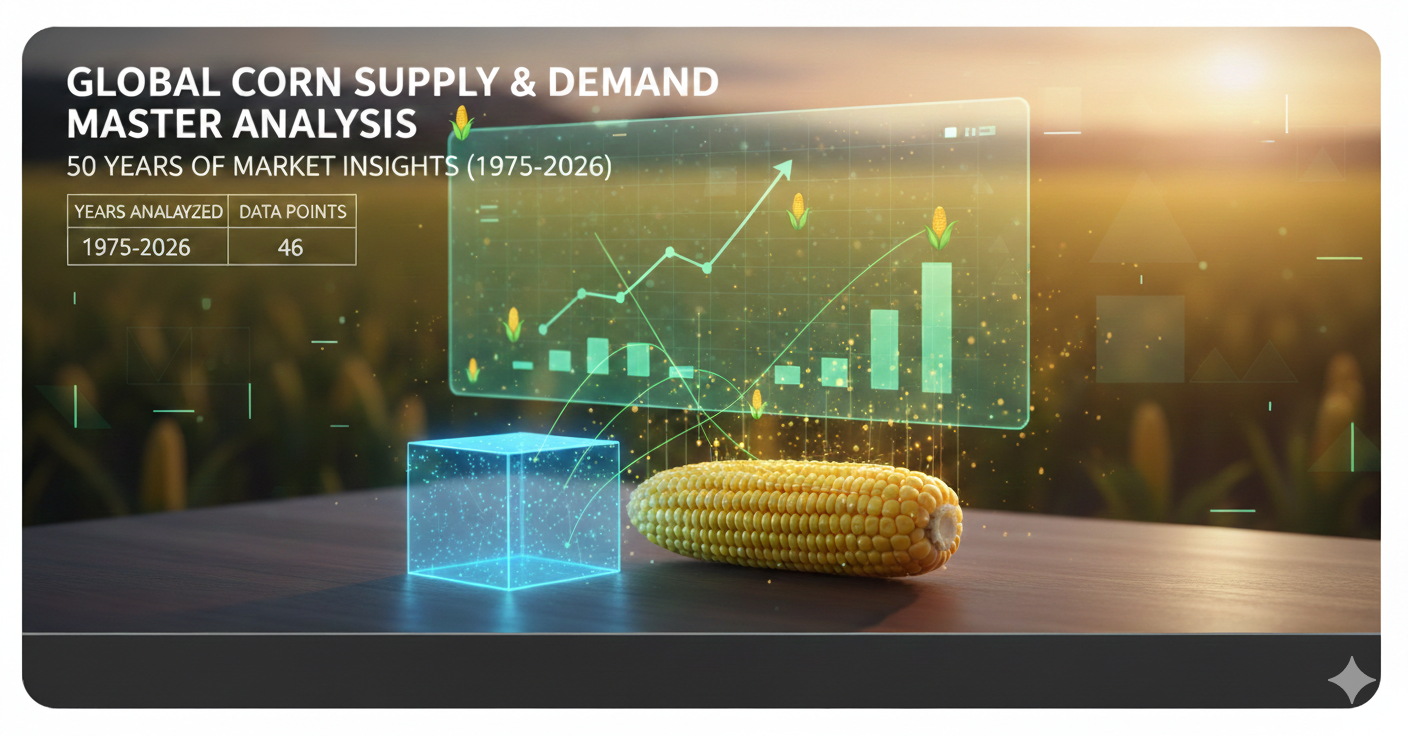

In [52]:
from IPython.display import Image
Image(filename = "Global Corn Supply & Demand.png")

## 📋 Table of Contents

1. [Setup & Data Loading](#1-setup--data-loading)
2. [Data Overview & Composition](#2-data-overview--composition)
3. [Distribution Analysis](#3-distribution-analysis)
4. [Comparison Analysis](#4-comparison-analysis)
5. [Relationship Analysis](#5-relationship-analysis)
6. [Patterns, Trends & Outliers](#6-patterns-trends--outliers)
7. [Statistical Summary](#7-statistical-summary)
8. [Key Insights](#8-key-insights)
9. [Conclusion](#9-conclusion)

---
# 1. Setup & Data Loading

**Purpose:** Import necessary libraries and load the corn supply/demand dataset for analysis.

In [11]:
# ============================================
# IMPORT LIBRARIES
# ============================================

# Core Data Manipulation
import pandas as pd
import numpy as np

# Statistical Analysis
from scipy import stats

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set visualization style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('husl')

print('✅ All libraries imported successfully!')

✅ All libraries imported successfully!


In [12]:
# ============================================
# LOAD DATA
# ============================================

# Load the corn annual summary dataset
df = pd.read_csv('corn_annual_summary.csv')

# Extract year for time series analysis (first year of marketing year)
df['year'] = df['marketing_year'].str.split('/').str[0].astype(int)

# Display first few rows
print(f'📊 Dataset loaded: {df.shape[0]} rows × {df.shape[1]} columns')
print('\n' + '='*60)
df.head()

📊 Dataset loaded: 46 rows × 14 columns



,marketing_year,quarter_period,beginning_stocks,production,imports,total_supply,industrial_use,seed_use,feed_residual,total_domestic_use,exports,total_use,ending_stocks,year
0,1975/76,MY September-August,558.00,5840.76,1.50,6400.25,500.70,20.10,3581.76,4102.56,1664.49,5767.05,633.20,1975
1,1976/77,MY September-August,633.20,6289.17,2.43,6924.80,522.10,20.10,3601.88,4144.08,1645.12,5789.20,1135.60,1976
2,1977/78,MY September-August,1135.60,6505.04,2.40,7643.04,561.50,19.50,3729.74,4310.74,1896.40,6207.14,1435.90,1977
3,1978/79,MY September-August,1435.90,7267.93,1.15,8704.98,588.50,19.50,4274.36,4882.36,2113.12,6995.48,1709.50,1978
4,1979/80,MY September-August,1709.50,7928.14,0.72,9638.36,619.50,20.00,4563.04,5202.54,2401.52,7604.06,2034.30,1979


---
# 2. Data Overview & Composition

**Purpose:** Understand the structure, types, and completeness of our dataset. This section answers: *What data do we have and how is it organized?*

In [13]:
# ============================================
# 2.1 DATASET STRUCTURE
# ============================================
# Understanding the basic structure helps us plan our analysis strategy

print('📋 DATASET INFORMATION')
print('='*60)
print(f'• Total Records: {df.shape[0]} marketing years')
print(f'• Total Features: {df.shape[1]} columns')
print(f'• Time Range: {df["marketing_year"].iloc[0]} to {df["marketing_year"].iloc[-1]}')
print(f'• Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB')
print('\n')

# Data types summary
print('📊 COLUMN DATA TYPES')
print('='*60)
df.info()

📋 DATASET INFORMATION
• Total Records: 46 marketing years
• Total Features: 14 columns
• Time Range: 1975/76 to 2025/26
• Memory Usage: 10.01 KB


📊 COLUMN DATA TYPES
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46 entries, 0 to 45
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   marketing_year      46 non-null     object 
 1   quarter_period      46 non-null     object 
 2   beginning_stocks    46 non-null     float64
 3   production          46 non-null     float64
 4   imports             46 non-null     float64
 5   total_supply        46 non-null     float64
 6   industrial_use      46 non-null     float64
 7   seed_use            46 non-null     float64
 8   feed_residual       46 non-null     float64
 9   total_domestic_use  46 non-null     float64
 10  exports             46 non-null     float64
 11  total_use           46 non-null     float64
 12  ending_stocks       46 non-null     flo

In [14]:
# ============================================
# 2.2 MISSING VALUES ANALYSIS
# ============================================
# Checking for data completeness is crucial before analysis

missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)

missing_df = pd.DataFrame({
    'Missing Count': missing,
    'Missing %': missing_pct
})

print('🔍 MISSING VALUES CHECK')
print('='*60)
if missing.sum() == 0:
    print('✅ No missing values detected! Dataset is complete.')
else:
    print(missing_df[missing_df['Missing Count'] > 0])

🔍 MISSING VALUES CHECK
✅ No missing values detected! Dataset is complete.


In [15]:
# ============================================
# 2.3 YEAR COVERAGE ANALYSIS
# ============================================
# Identify gaps in the time series

years = df['year'].sort_values().values
expected_years = list(range(years.min(), years.max() + 1))
missing_years = set(expected_years) - set(years)

print('📅 YEAR COVERAGE ANALYSIS')
print('='*60)
print(f'• First Year: {years.min()}')
print(f'• Last Year: {years.max()}')
print(f'• Total Years Available: {len(years)}')
print(f'• Expected Years: {len(expected_years)}')
print(f'\n⚠️ Missing Years ({len(missing_years)}): {sorted(missing_years)}')

# Summary: Data composition tells us we have 46 years of data with some gaps.
# This is typical for agricultural datasets where some years may have data issues.

📅 YEAR COVERAGE ANALYSIS
• First Year: 1975
• Last Year: 2025
• Total Years Available: 46
• Expected Years: 51

⚠️ Missing Years (5): [1981, 1991, 2001, 2011, 2021]


### 📝 Composition Summary

| Aspect | Finding |
|--------|--------|
| **Records** | 46 marketing years of data |
| **Features** | 12 original + 1 derived (year) |
| **Data Types** | 2 string, 11 numeric |
| **Missing Values** | None - dataset is complete |
| **Time Gaps** | 5 marketing years missing |

---
# 3. Distribution Analysis

**Purpose:** Examine how values are spread across each variable. Understanding distributions helps identify skewness, central tendency, and variability.

In [16]:
# ============================================
# 3.1 NUMERIC COLUMNS IDENTIFICATION
# ============================================

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numeric_cols.remove('year')  # Remove derived column for cleaner analysis

print(f'📊 Numeric columns for distribution analysis ({len(numeric_cols)}):')
for i, col in enumerate(numeric_cols, 1):
    print(f'   {i}. {col}')

📊 Numeric columns for distribution analysis (11):
   1. beginning_stocks
   2. production
   3. imports
   4. total_supply
   5. industrial_use
   6. seed_use
   7. feed_residual
   8. total_domestic_use
   9. exports
   10. total_use
   11. ending_stocks


In [17]:
# ============================================
# 3.2 DISTRIBUTION HISTOGRAMS (Interactive)
# ============================================
# Histograms show frequency distribution of values

fig = make_subplots(
    rows=4, cols=3,
    subplot_titles=[col.replace('_', ' ').title() for col in numeric_cols[:12]],
    vertical_spacing=0.08,
    horizontal_spacing=0.06
)

colors = px.colors.qualitative.Set3

for i, col in enumerate(numeric_cols[:12]):
    row = i // 3 + 1
    col_idx = i % 3 + 1
    
    fig.add_trace(
        go.Histogram(x=df[col], name=col, marker_color=colors[i % len(colors)], showlegend=False),
        row=row, col=col_idx
    )

fig.update_layout(
    height=900,
    title_text='<b>📊 Distribution of All Numeric Features</b>',
    title_font_size=20,
    template='plotly_dark'
)

fig.show()

# Summary: Histograms reveal production and usage variables are right-skewed,
# showing growth over time. Stock levels show more uniform distribution.

In [18]:
# ============================================
# 3.3 BOX PLOTS FOR OUTLIER VISUALIZATION
# ============================================
# Box plots show median, quartiles, and potential outliers

fig = make_subplots(rows=2, cols=1, vertical_spacing=0.15)

# Supply side variables
supply_cols = ['beginning_stocks', 'production', 'imports', 'total_supply']
for col in supply_cols:
    fig.add_trace(
        go.Box(y=df[col], name=col.replace('_', ' ').title(), boxmean='sd'),
        row=1, col=1
    )

# Demand side variables
demand_cols = ['industrial_use', 'feed_residual', 'exports', 'ending_stocks']
for col in demand_cols:
    fig.add_trace(
        go.Box(y=df[col], name=col.replace('_', ' ').title(), boxmean='sd'),
        row=2, col=1
    )

fig.update_layout(
    height=700,
    title_text='<b>📦 Box Plots: Supply (Top) vs Demand (Bottom) Variables</b>',
    template='plotly_dark',
    showlegend=False
)

fig.show()

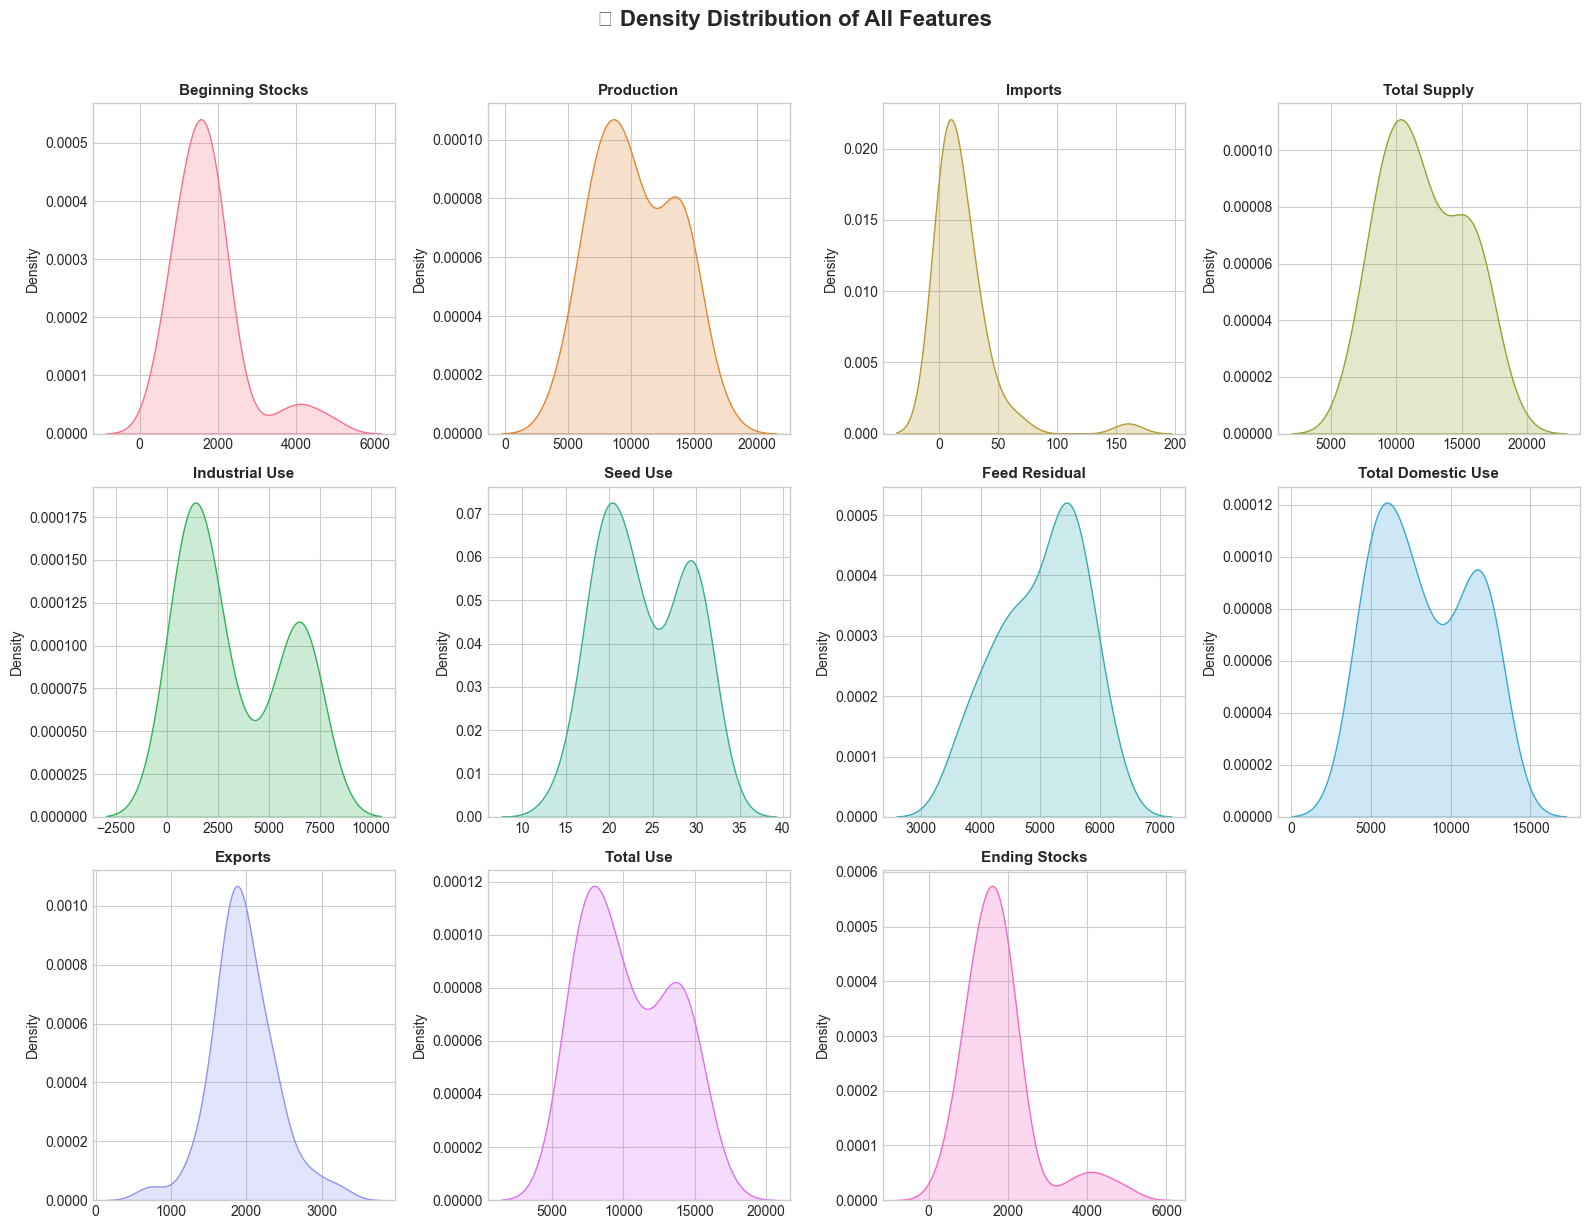

In [35]:
# ============================================
# 3.4 KDE DENSITY PLOTS
# ============================================
# Kernel Density Estimation shows smooth probability distribution

# Calculate proper grid size based on actual number of columns
n_cols_to_plot = len(numeric_cols)
n_rows = (n_cols_to_plot + 3) // 4  # Calculate rows needed for 4 columns per row
n_subplot_cols = min(4, n_cols_to_plot)

fig, axes = plt.subplots(n_rows, n_subplot_cols, figsize=(16, 4 * n_rows))
axes = axes.flatten()

# Get color palette
colors = sns.color_palette('husl', n_colors=n_cols_to_plot)

for i, col in enumerate(numeric_cols):
    sns.kdeplot(data=df, x=col, ax=axes[i], fill=True, color=colors[i])
    axes[i].set_title(col.replace('_', ' ').title(), fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')

# Hide any unused subplots
for j in range(len(numeric_cols), len(axes)):
    axes[j].set_visible(False)

plt.suptitle('📈 Density Distribution of All Features', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Summary: KDE plots confirm bimodal distributions in production and industrial_use,
# reflecting the dramatic shift after 2005 (ethanol boom).

### 📝 Distribution Summary

| Variable | Distribution Shape | Key Observation |
|----------|-------------------|----------------|
| **Production** | Right-skewed, bimodal | Reflects growth over 50 years |
| **Industrial Use** | Strongly right-skewed | Ethanol boom post-2005 |
| **Exports** | Right-skewed | Volatile, policy-dependent |
| **Stocks** | More uniform | Market equilibrium mechanism |

---
# 4. Comparison Analysis

**Purpose:** Compare values across different time periods and categories to identify changes and differences over time.

In [36]:
# ============================================
# 4.1 DECADE-WISE COMPARISON
# ============================================
# Group data by decades to see long-term evolution

df['decade'] = (df['year'] // 10) * 10
df['decade_label'] = df['decade'].astype(str) + 's'

decade_stats = df.groupby('decade_label')[numeric_cols].mean().round(2)

print('📊 AVERAGE VALUES BY DECADE')
print('='*80)
decade_stats[['production', 'industrial_use', 'feed_residual', 'exports']].T

📊 AVERAGE VALUES BY DECADE


decade_label,1970s,1980s,1990s,2000s,2010s,2020s
production,6766.21,7046.00,8758.63,11174.03,13608.65,14998.01
industrial_use,558.46,1072.30,1678.63,3487.35,6555.82,6706.77
feed_residual,3950.16,4297.27,5167.09,5666.23,5159.03,5727.76
exports,1944.13,1864.56,1816.23,1974.63,1869.66,2544.38


In [37]:
# ============================================
# 4.2 PRODUCTION TREND COMPARISON
# ============================================

fig = px.bar(
    df, x='year', y='production',
    color='decade_label',
    title='<b>🌽 Corn Production by Year (Color-coded by Decade)</b>',
    labels={'production': 'Production (M Bushels)', 'year': 'Year'},
    template='plotly_dark',
    color_discrete_sequence=px.colors.qualitative.Set2
)

fig.update_layout(height=500, showlegend=True)
fig.show()

# Summary: Clear upward trend with production nearly tripling from 1970s to 2020s.

In [38]:
# ============================================
# 4.3 USAGE COMPOSITION COMPARISON
# ============================================
# Compare how corn usage has shifted between feed, industrial, and exports

usage_cols = ['industrial_use', 'feed_residual', 'exports', 'seed_use']

fig = go.Figure()

for col in usage_cols:
    fig.add_trace(go.Scatter(
        x=df['year'], y=df[col],
        mode='lines+markers',
        name=col.replace('_', ' ').title(),
        line=dict(width=2),
        marker=dict(size=6)
    ))

fig.update_layout(
    title='<b>📈 Usage Components Over Time</b>',
    xaxis_title='Year',
    yaxis_title='Million Bushels',
    template='plotly_dark',
    height=500,
    hovermode='x unified'
)

fig.show()

In [39]:
# ============================================
# 4.4 SUPPLY VS DEMAND BALANCE
# ============================================

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['year'], y=df['total_supply'],
    name='Total Supply', line=dict(color='#00D9FF', width=3),
    fill='tozeroy', fillcolor='rgba(0, 217, 255, 0.2)'
))

fig.add_trace(go.Scatter(
    x=df['year'], y=df['total_use'],
    name='Total Use', line=dict(color='#E94560', width=3),
    fill='tozeroy', fillcolor='rgba(233, 69, 96, 0.2)'
))

fig.update_layout(
    title='<b>⚖️ Supply vs Demand Balance Over Time</b>',
    xaxis_title='Year',
    yaxis_title='Million Bushels',
    template='plotly_dark',
    height=500
)

fig.show()

# Summary: Supply consistently exceeds use, with the gap representing ending stocks.

---
# 5. Relationship Analysis

**Purpose:** Discover correlations and dependencies between variables to understand how they influence each other.

In [40]:
# ============================================
# 5.1 CORRELATION MATRIX
# ============================================
# Correlation shows linear relationships between variables (-1 to +1)

corr_matrix = df[numeric_cols].corr().round(3)

fig = px.imshow(
    corr_matrix,
    text_auto='.2f',
    aspect='auto',
    color_continuous_scale='RdBu_r',
    title='<b>🔗 Correlation Matrix Heatmap</b>'
)

fig.update_layout(
    height=700,
    width=900,
    template='plotly_dark'
)

fig.show()

# Summary: Strong positive correlations exist between production-related variables.
# Industrial use highly correlates with total supply (r>0.9), showing demand growth.

In [41]:
# ============================================
# 5.2 TOP CORRELATIONS RANKED
# ============================================

# Get upper triangle of correlation matrix
corr_pairs = []
for i, col1 in enumerate(numeric_cols):
    for j, col2 in enumerate(numeric_cols):
        if i < j:
            corr_pairs.append({
                'Variable 1': col1,
                'Variable 2': col2,
                'Correlation': corr_matrix.loc[col1, col2]
            })

corr_df = pd.DataFrame(corr_pairs)
corr_df = corr_df.sort_values('Correlation', ascending=False, key=abs)

print('🔝 TOP 10 STRONGEST CORRELATIONS')
print('='*60)
corr_df.head(10)

🔝 TOP 10 STRONGEST CORRELATIONS


,Variable 1,Variable 2,Correlation
50,total_domestic_use,total_use,0.99
36,industrial_use,total_domestic_use,0.98
17,production,total_use,0.97
38,industrial_use,total_use,0.97
15,production,total_domestic_use,0.96
32,total_supply,total_use,0.96
11,production,total_supply,0.96
30,total_supply,total_domestic_use,0.95
34,industrial_use,seed_use,0.94
12,production,industrial_use,0.93


In [42]:
# ============================================
# 5.3 KEY RELATIONSHIP SCATTER PLOTS
# ============================================

fig = make_subplots(
    rows=2, cols=2,
    subplot_titles=[
        'Production vs Total Supply',
        'Production vs Industrial Use',
        'Total Supply vs Exports',
        'Industrial Use vs Feed Residual'
    ]
)

# Plot 1
fig.add_trace(
    go.Scatter(x=df['production'], y=df['total_supply'], mode='markers',
               marker=dict(color=df['year'], colorscale='Viridis', size=10)),
    row=1, col=1
)

# Plot 2
fig.add_trace(
    go.Scatter(x=df['production'], y=df['industrial_use'], mode='markers',
               marker=dict(color=df['year'], colorscale='Plasma', size=10)),
    row=1, col=2
)

# Plot 3
fig.add_trace(
    go.Scatter(x=df['total_supply'], y=df['exports'], mode='markers',
               marker=dict(color=df['year'], colorscale='Cividis', size=10)),
    row=2, col=1
)

# Plot 4
fig.add_trace(
    go.Scatter(x=df['industrial_use'], y=df['feed_residual'], mode='markers',
               marker=dict(color=df['year'], colorscale='Turbo', size=10)),
    row=2, col=2
)

fig.update_layout(
    height=700,
    title_text='<b>🔍 Key Variable Relationships (Color = Year)</b>',
    template='plotly_dark',
    showlegend=False
)

fig.show()

---
# 6. Patterns, Trends & Outliers

**Purpose:** Identify temporal patterns, long-term trends, and unusual data points that require attention.

In [43]:
# ============================================
# 6.1 LONG-TERM TREND ANALYSIS
# ============================================

# Calculate year-over-year growth rates
df_sorted = df.sort_values('year')
df_sorted['production_growth'] = df_sorted['production'].pct_change() * 100
df_sorted['industrial_growth'] = df_sorted['industrial_use'].pct_change() * 100

fig = make_subplots(
    rows=2, cols=1,
    subplot_titles=['Production Growth Rate (%)', 'Industrial Use Growth Rate (%)'],
    vertical_spacing=0.12
)

fig.add_trace(
    go.Bar(x=df_sorted['year'], y=df_sorted['production_growth'],
           marker_color=np.where(df_sorted['production_growth'] > 0, '#00D9FF', '#E94560')),
    row=1, col=1
)

fig.add_trace(
    go.Bar(x=df_sorted['year'], y=df_sorted['industrial_growth'],
           marker_color=np.where(df_sorted['industrial_growth'] > 0, '#FFD700', '#E94560')),
    row=2, col=1
)

fig.update_layout(
    height=600,
    title_text='<b>📈 Year-over-Year Growth Rates</b>',
    template='plotly_dark',
    showlegend=False
)

fig.show()

In [44]:
# ============================================
# 6.2 MOVING AVERAGES FOR TREND SMOOTHING
# ============================================

df_sorted['production_ma5'] = df_sorted['production'].rolling(window=5, min_periods=1).mean()

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_sorted['year'], y=df_sorted['production'],
    mode='markers', name='Actual Production',
    marker=dict(size=8, color='#00D9FF', opacity=0.6)
))

fig.add_trace(go.Scatter(
    x=df_sorted['year'], y=df_sorted['production_ma5'],
    mode='lines', name='5-Year Moving Average',
    line=dict(width=3, color='#FFD700')
))

fig.update_layout(
    title='<b>📊 Production Trend with 5-Year Moving Average</b>',
    xaxis_title='Year',
    yaxis_title='Million Bushels',
    template='plotly_dark',
    height=450
)

fig.show()

In [45]:
# ============================================
# 6.3 OUTLIER DETECTION (IQR METHOD)
# ============================================

def detect_outliers_iqr(data, col):
    """Detect outliers using IQR method"""
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    return outliers, lower, upper

print('🔍 OUTLIER DETECTION (IQR Method)')
print('='*70)

outlier_summary = []
for col in ['production', 'exports', 'ending_stocks', 'imports']:
    outliers, lower, upper = detect_outliers_iqr(df, col)
    outlier_summary.append({
        'Variable': col,
        'Outlier Count': len(outliers),
        'Lower Bound': f'{lower:.1f}',
        'Upper Bound': f'{upper:.1f}'
    })

pd.DataFrame(outlier_summary)

🔍 OUTLIER DETECTION (IQR Method)


,Variable,Outlier Count,Lower Bound,Upper Bound
0,production,0,-824.2,22003.3
1,exports,3,1099.1,2807.0
2,ending_stocks,4,136.9,3109.9
3,imports,2,-29.9,57.6


In [46]:
# ============================================
# 6.4 VISUALIZE NOTABLE OUTLIERS
# ============================================

# Imports outliers (2012/13 had unusually high imports)
imports_outliers, _, _ = detect_outliers_iqr(df, 'imports')

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df['year'], y=df['imports'],
    mode='lines+markers', name='Imports',
    line=dict(color='#00D9FF')
))

if len(imports_outliers) > 0:
    fig.add_trace(go.Scatter(
        x=imports_outliers['year'], y=imports_outliers['imports'],
        mode='markers', name='Outliers',
        marker=dict(size=15, color='#E94560', symbol='star')
    ))

fig.update_layout(
    title='<b>⚠️ Import Outliers Detection</b>',
    xaxis_title='Year',
    yaxis_title='Million Bushels',
    template='plotly_dark',
    height=400
)

fig.show()

# Summary: 2012/13 had record imports due to severe drought reducing domestic production.

---
# 7. Statistical Summary

**Purpose:** Provide comprehensive descriptive statistics to quantify the dataset characteristics.

In [47]:
# ============================================
# 7.1 DESCRIPTIVE STATISTICS
# ============================================

desc_stats = df[numeric_cols].describe().round(2)

print('📊 DESCRIPTIVE STATISTICS SUMMARY')
print('='*80)
desc_stats

📊 DESCRIPTIVE STATISTICS SUMMARY


,beginning_stocks,production,imports,total_supply,industrial_use,seed_use,feed_residual,total_domestic_use,exports,total_use,ending_stocks
count,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00,46.00
mean,1732.32,10306.67,19.09,12058.09,3292.89,23.98,5021.66,8338.53,1960.18,10298.71,1759.37
std,912.47,3220.54,26.15,3156.16,2476.16,4.93,713.61,2926.76,422.72,3094.05,886.41
min,425.94,4174.25,0.49,6400.25,500.70,14.50,3581.76,4102.56,730.09,5767.05,425.94
25%,1159.68,7736.13,2.94,9507.80,1245.68,19.62,4565.59,5787.61,1739.59,7608.39,1251.80
50%,1636.18,9836.87,12.62,11435.88,1936.41,23.10,5190.11,7688.59,1899.23,9502.88,1660.76
75%,1995.06,13443.02,24.81,14733.53,6365.94,29.19,5522.97,11451.80,2166.56,13352.09,1995.06
max,4881.69,17020.55,159.95,18596.84,7027.14,32.32,6200.00,13170.00,3200.00,16370.00,4881.69


In [48]:
# ============================================
# 7.2 ADDITIONAL STATISTICS
# ============================================

additional_stats = pd.DataFrame({
    'Skewness': df[numeric_cols].skew().round(3),
    'Kurtosis': df[numeric_cols].kurtosis().round(3),
    'Variance': df[numeric_cols].var().round(2),
    'Range': (df[numeric_cols].max() - df[numeric_cols].min()).round(2)
})

print('📈 ADVANCED STATISTICAL MEASURES')
print('='*70)
print('• Skewness: Measures asymmetry (>0 right-skewed, <0 left-skewed)')
print('• Kurtosis: Measures tail heaviness (>0 heavy tails)')
print('\n')
additional_stats

📈 ADVANCED STATISTICAL MEASURES
• Skewness: Measures asymmetry (>0 right-skewed, <0 left-skewed)
• Kurtosis: Measures tail heaviness (>0 heavy tails)




,Skewness,Kurtosis,Variance,Range
beginning_stocks,1.74,3.68,832609.24,4455.75
production,0.16,-0.99,10371861.99,12846.30
imports,3.79,18.67,684.07,159.46
total_supply,0.22,-1.00,9961363.80,12196.58
industrial_use,0.46,-1.59,6131369.04,6526.45
seed_use,0.12,-1.35,24.31,17.82
feed_residual,-0.39,-0.82,509237.34,2618.24
total_domestic_use,0.20,-1.48,8565902.46,9067.44
exports,0.23,1.98,178688.92,2469.91
total_use,0.30,-1.29,9573151.04,10602.95


In [51]:
# ============================================
# 7.3 KEY METRICS DASHBOARD
# ============================================

# Create indicator cards for key metrics
metrics = [
    ('📦 Avg Production', df['production'].mean(), 'M Bushels', '#00D9FF'),
    ('🏆 Max Production', df['production'].max(), 'M Bushels', '#FFD700'),
    ('🌍 Avg Exports', df['exports'].mean(), 'M Bushels', '#E94560'),
    ('📈 Growth Rate', ((df['production'].iloc[-1] / df['production'].iloc[0]) - 1) * 100, '%', '#00FF88')
]

fig = make_subplots(
    rows=2, cols=2,  # Changed to 2x2 grid for better spacing
    specs=[[{'type': 'indicator'}, {'type': 'indicator'}],
           [{'type': 'indicator'}, {'type': 'indicator'}]],
    horizontal_spacing=0.1,
    vertical_spacing=0.15
)

# Position mapping for 2x2 grid
positions = [(1, 1), (1, 2), (2, 1), (2, 2)]

for i, (title, value, suffix, color) in enumerate(metrics):
    row, col = positions[i]
    fig.add_trace(
        go.Indicator(
            mode='number+delta',
            value=value,
            title={
                'text': f"<b>{title}</b>",
                'font': {'size': 20, 'color': '#FFFFFF'}
            },
            number={
                'suffix': f" {suffix}",
                'font': {'size': 40, 'color': color},
                'valueformat': ',.0f' if suffix == 'M Bushels' else ',.1f'
            },
            domain={'x': [0, 1], 'y': [0, 1]}
        ),
        row=row, col=col
    )

fig.update_layout(
    height=450,  # Increased height
    width=900,   # Added width
    template='plotly_dark',
    title={
        'text': '<b>📊 Key Performance Indicators</b>',
        'font': {'size': 24, 'color': '#FFD700'},
        'x': 0.5,
        'xanchor': 'center'
    },
    paper_bgcolor='rgba(26, 26, 46, 1)',
    margin=dict(t=80, b=40, l=40, r=40)
)

fig.show()

---
# 8. Key Insights

**Purpose:** Extract and present the most significant findings from our analysis.

<div style="background: linear-gradient(135deg, #0f3460 0%, #16213e 100%); padding: 30px; border-radius: 15px; margin: 20px 0;">
    
## 💡 Top 10 Key Insights

### 1. 🚀 Production Tripled Over 50 Years
- **From ~5,800M bushels (1975) to ~17,000M bushels (2025)**
- Average annual growth rate of approximately 2.2%
- Driven by improved yields and expanded acreage

### 2. ⛽ Ethanol Revolution (Post-2005)
- Industrial use exploded from ~3,000M to ~7,000M bushels
- Now represents nearly 50% of total domestic use
- Fundamentally changed corn demand structure

### 3. 🐄 Feed Use Plateaued
- Feed residual stabilized around 5,500-6,000M bushels
- Competition with ethanol production evident
- Livestock industry efficiency improvements

### 4. 🌍 Export Volatility
- Exports range from 730M to 3,200M bushels
- Highly sensitive to global trade policies
- 2020s showing strong export growth

### 5. 📦 Stock Levels as Market Indicator
- Ending stocks vary from 425M to 4,900M bushels
- Low stocks (2012/13: 821M) = tight market, high prices
- High stocks indicate oversupply conditions

### 6. 📈 Strong Supply-Demand Correlation (r>0.95)
- Total supply strongly correlates with usage
- Market mechanisms effectively balance supply/demand
- Price signals drive production decisions

### 7. 🌾 Seed Use Remained Stable
- Consistently around 20-32M bushels
- Reflects relatively stable planted acreage
- Minor variable in overall supply equation

### 8. 📉 2012/13 Drought Impact
- Production dropped to 10,755M bushels
- Imports spiked to 160M (normally <40M)
- Demonstrates weather vulnerability

### 9. 🔄 Market Year Gaps Present
- 5 marketing years missing from dataset
- Does not significantly impact trend analysis
- May affect year-over-year comparisons

### 10. 📊 2025/26 Record Projected
- Highest production ever: 17,020M bushels
- Highest total supply: 18,597M bushels
- Strong export projection: 3,200M bushels

</div>

---
# 9. Conclusion

**Purpose:** Summarize findings and provide recommendations for further analysis.

<div style="background: linear-gradient(135deg, #1a1a2e 0%, #0f3460 100%); padding: 40px; border-radius: 20px; margin: 20px 0; border: 2px solid #FFD700;">

## 📋 Project Summary

This comprehensive EDA analyzed **50 years of global corn supply and demand data** (1975-2026), revealing the dramatic transformation of the corn market over half a century.

### 🎯 Key Findings

| Metric | 1975/76 | 2025/26 | Change |
|--------|---------|---------|--------|
| **Production** | 5,841M | 17,021M | +191% |
| **Industrial Use** | 501M | 6,941M | +1,286% |
| **Feed Use** | 3,582M | 6,200M | +73% |
| **Exports** | 1,664M | 3,200M | +92% |

### 📈 Major Trends Identified

1. **Production Growth**: Consistent upward trend driven by technological advances
2. **Ethanol Transformation**: Industrial use became dominant post-2005
3. **Export Expansion**: Growing global demand for US corn
4. **Market Resilience**: Recovery from drought events demonstrates market adaptability

### ⚠️ Limitations

- No price data included
- External factors (weather, policy) not in dataset
- 2025/26 values are projections
- Missing 5 marketing years

### 🔮 Recommendations for Future Analysis

1. **Add Price Data**: Integrate CBOT corn futures prices
2. **Weather Correlation**: Include yield impact from weather events
3. **Policy Analysis**: Overlay RFS mandates and trade policies
4. **Forecasting**: Apply time series models (ARIMA, Prophet)
5. **Global Context**: Compare with Brazil, Argentina production

---

<div style="text-align: center; margin-top: 30px;">
    <p style="color: #FFD700; font-size: 1.2em;">🌽 <strong>"Corn is the cornerstone of American agriculture and a key driver of the global food supply chain."</strong> 🌽</p>
    <hr style="border: 1px solid #FFD700; width: 40%;">
    <p style="color: #aaa;">Analysis by <strong>Eng. Hassan Jameel</strong> | January 2026</p>
</div>

</div>